<a href="https://colab.research.google.com/github/franciskingk/Classification-with-R/blob/main/Classification_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering with R by Francis Gikaru Njeri

Kira Plastinina (Links to an external site.) is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China,Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand  their customer’s behavior from data that they have collected over the past year. More  specifically, they would like to learn the characteristics of customer groups.

Perform clustering stating insights drawn from your analysis and visualizations.

Upon implementation, provide comparisons between the approaches learned this week i.e.  K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 
Your findings should help inform the team in formulating the marketing and sales strategies of the brand. 


In [2]:
install.packages("caret")
install.packages("corrplot")
install.packages("clustvarsel")
install.packages("mclust")
install.packages("wskm")
install.packages("cluster")
install.packages("FSelector")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘mclust’, ‘BMA’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘png’, ‘jpeg’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘kernlab’, ‘latticeExtra’, ‘fpc’


Installing package into ‘/usr/local/lib/R/site-libr

In [14]:
# calling libraries
library(ggplot2)
library(mclust)
library(caret)
library(corrplot)
library(clustvarsel)
library(wskm)
library(cluster)
library(FSelector)
library(tidyverse)
library(reshape2)
library(lattice)
#install.packages('DataExplorer')
library(DataExplorer)
install.packages('Hmisc')
library(Hmisc) 
install.packages('pastecs')
library(pastecs)
install.packages('psych')
library(psych) 
install.packages('factoextra')
library(factoextra) 
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘Formula’, ‘htmlTable’, ‘viridis’


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is masked from ‘package:tidyr’:

    extract


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following object is masked from ‘package:Hmisc’

In [4]:
# loading and previewing the dataset
df<-read.csv('http://bit.ly/EcommerceCustomersDataset')
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [5]:
# data cleaning
# checking for null values
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [6]:
# checking the column names
colnames(df)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [7]:
#checking to see the dimentions of the dataset
dim(df)
#it has 12330 rows and 18 columns

[1] 12330    18

In [16]:
# dealing with the null values
df1<-na.omit(df)

In [9]:
# checking for duplicates
duplicated(df1)
#there are no duplicated values in the dataset

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [17]:
# summary of the numeric columns
summary(df1)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates         ExitRates         PageValues        SpecialDay    
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.000   Min

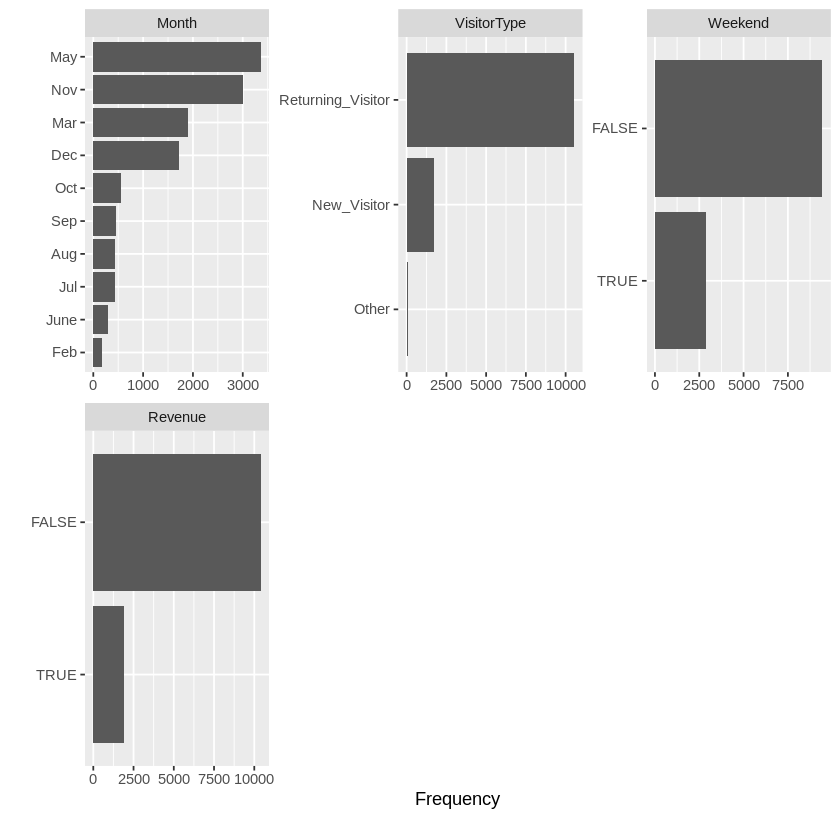

In [18]:
# Plotting to see the distribution of the dataset
plot_bar(df1)

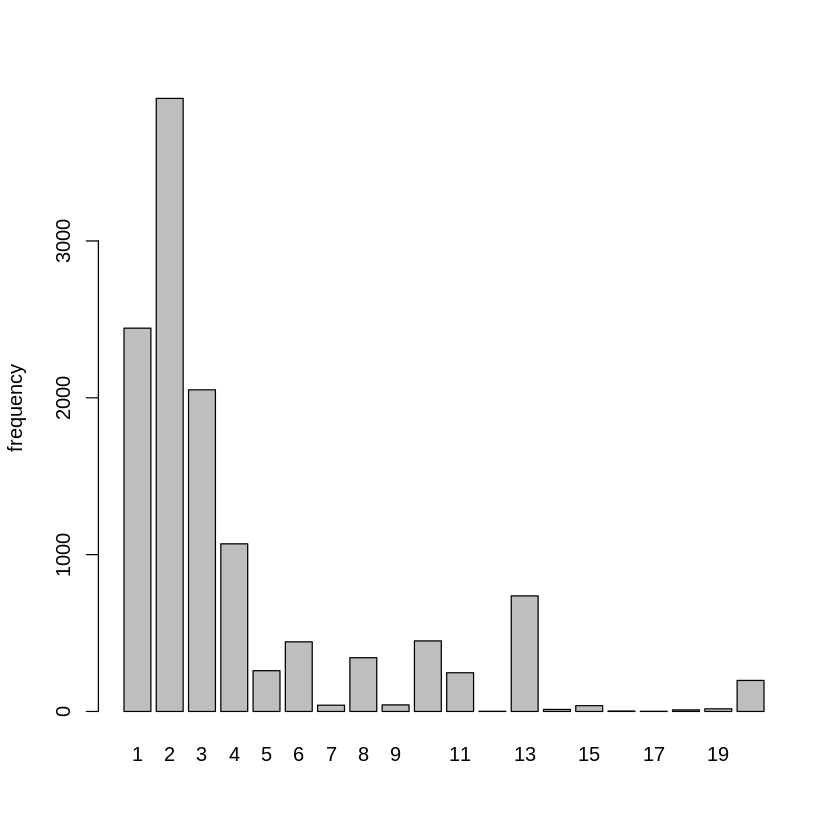

In [19]:
# plotting to see distribution of traffic type
trafic <- df1$TrafficType
method_table <- table(trafic)
barplot(method_table,ylab= 'frequency')
#traffic type 2 and 1 are the most in use.

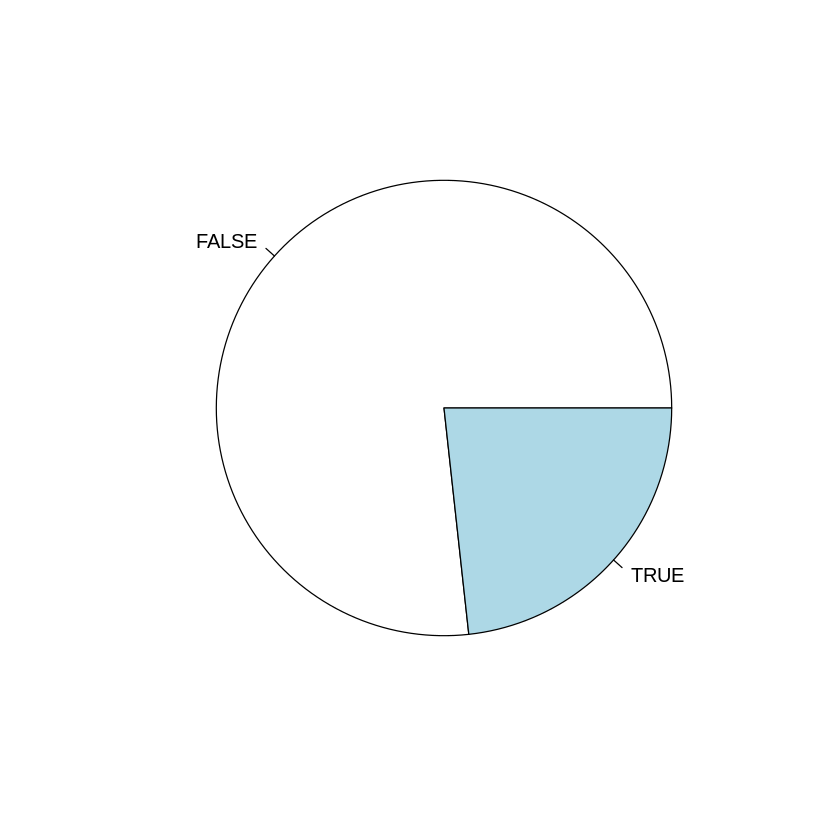

In [20]:
#plotting to see the type of day
day <- df1$Weekend
day_count <- table(day)
pie(day_count)
# most of the activity is in the weekdays.

Using Month, VisitorType, Weekend, Revenue as id variables



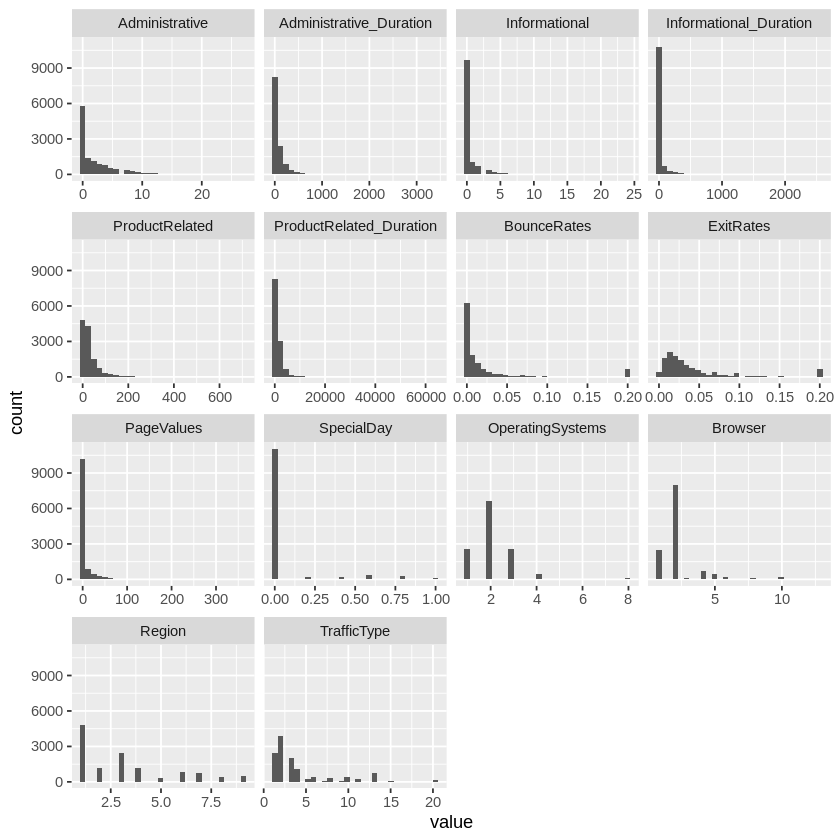

In [21]:
# checking the distribution of the datset
ggplot(data = melt(df1), mapping = aes(x = value)) + 
    geom_histogram(bins = 30) + facet_wrap(~variable, scales = 'free_x')

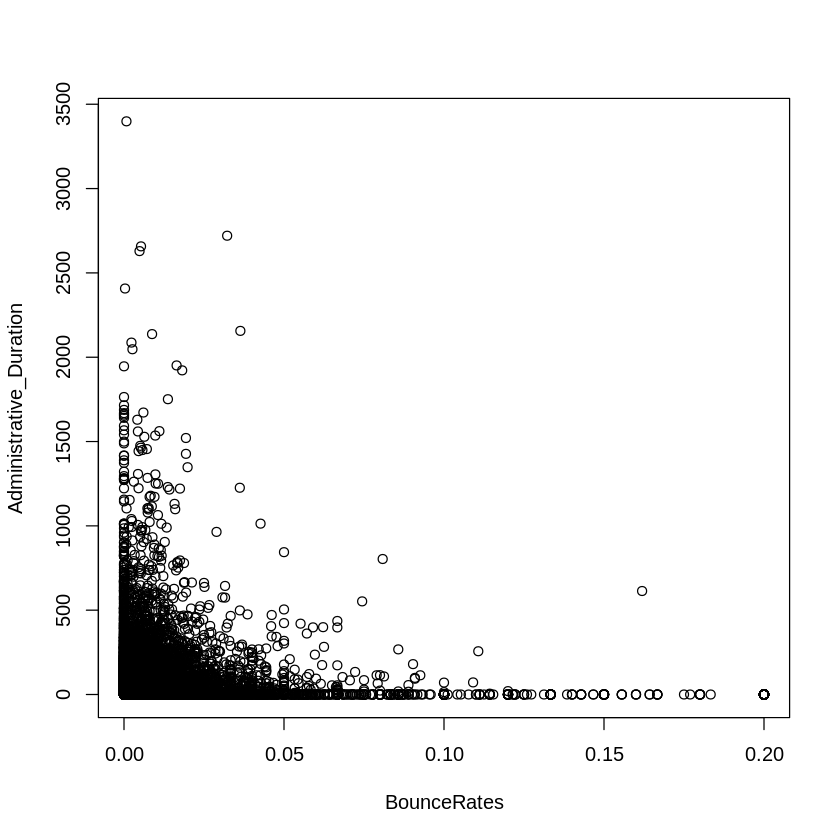

In [22]:
# plotting to see the distribution between administrative_duration and bounce rate
plot(Administrative_Duration~BounceRates, data=df1)
# 

In [23]:
#checking the column header
names(df1)
 

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [25]:
# selecting numeric variables
df_numeric<- select_if(df1,is.numeric)
head(df_numeric)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


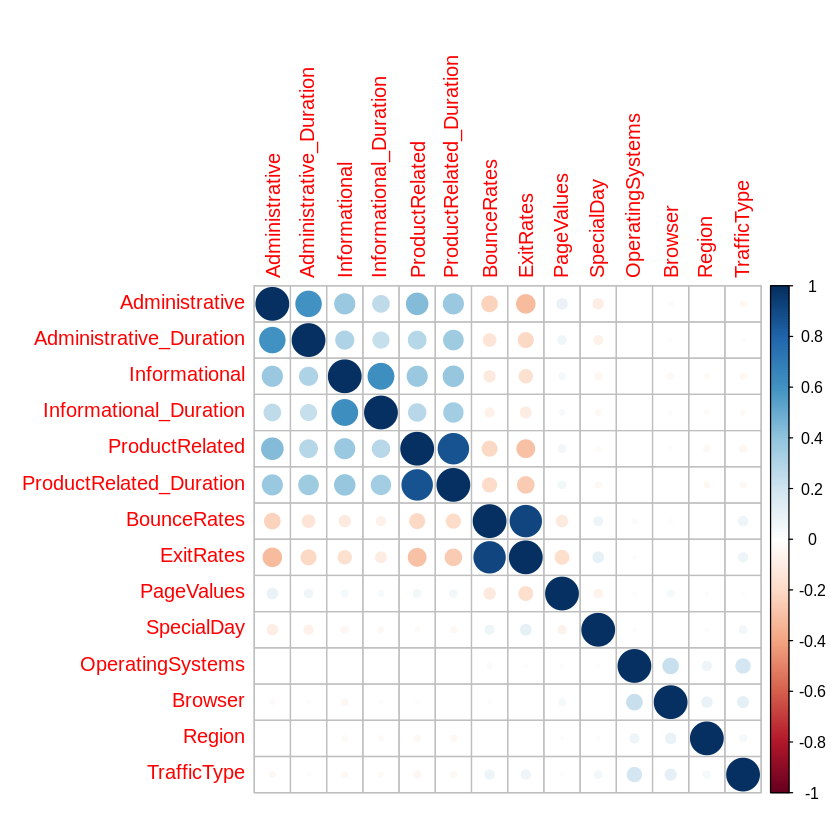

In [26]:
# finding correlation 
corrplot(cor(df_numeric),method = "circle")

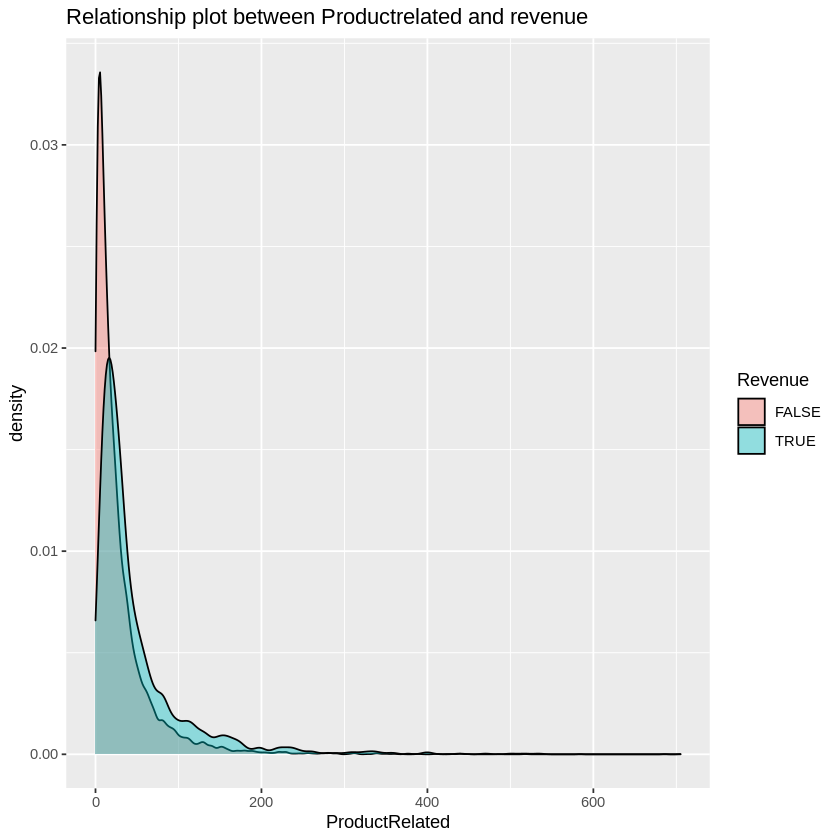

In [27]:
# plotting to see the relationship between product and revenue.
ggplot(df1, 
       aes(x = ProductRelated,
           fill =Revenue)) +
  geom_density(alpha = 0.4) +
    labs(title = "Relationship plot between Productrelated and revenue")

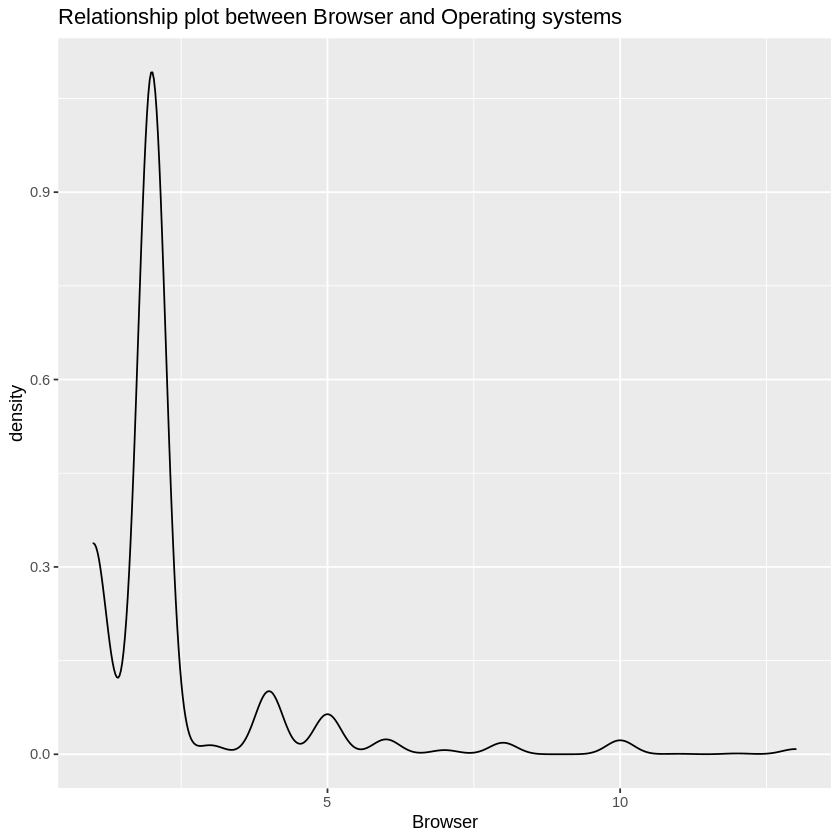

In [28]:
# plotting to see the relationship between Browser and Operating systems.
ggplot(df1, 
       aes(x = Browser,
           fill =OperatingSystems)) +
  geom_density(alpha = 0.4) +
    labs(title = "Relationship plot between Browser and Operating systems")

In [ ]:
# 
#install.packages('party')
library(party)
library('randomForest')

In [37]:
real_var<- dummyVars("~.", data = df1)
real_df<- data.frame(predict(real_var, newdata = df1))
glimpse(real_df)

Rows: 12,316
Columns: 31
$ Administrative               <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ Administrative_Duration      <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0,…
$ Informational                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Informational_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0,…
$ ProductRelated               <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7,…
$ ProductRelated_Duration      <dbl> 0.000000, 64.000000, -1.000000, 2.666667,…
$ BounceRates                  <dbl> 0.200000000, 0.000000000, 0.200000000, 0.…
$ ExitRates                    <dbl> 0.200000000, 0.100000000, 0.200000000, 0.…
$ PageValues                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ SpecialDay                   <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0…
$ MonthAug                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthDec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthFeb     

In [45]:
# selecting the independent variables and scaling them
real_df1 <- real_df[,-c(30:31)]
real_df.target <- df1[,'Revenue']
real_df1.scaled <- scale(real_df1)
summary(real_df1.scaled)

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6976   Min.   :-0.46311        Min.   :-0.3966  
 1st Qu.:-0.6976   1st Qu.:-0.45746        1st Qu.:-0.3966  
 Median :-0.3966   Median :-0.41222        Median :-0.3966  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5063   3rd Qu.: 0.07121        3rd Qu.:-0.3966  
 Max.   : 7.4282   Max.   :18.75967        Max.   :18.4906  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2521        Min.   :-0.7139   Min.   :-0.6253        
 1st Qu.:-0.2450        1st Qu.:-0.5566   1st Qu.:-0.5281        
 Median :-0.2450        Median :-0.3094   Median :-0.3115        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2450        3rd Qu.: 0.1402   3rd Qu.: 0.1413        
 Max.   :17.8581        Max.   :15.1322   Max.   :32.7927        
  BounceRates        ExitRates         PageValues        SpecialDay    
 Min.   :-0.4574   Min.   :-0.8862   Mi

In [47]:
# normalising the data
final_df <- as.data.frame(apply(real_df1.scaled, 2, function(x) (x-min(x))/(max(x)-min(x)))) 
summary(final_df)

 Administrative    Administrative_Duration Informational  
 Min.   :0.00000   Min.   :0.0000000       Min.   :0.000  
 1st Qu.:0.00000   1st Qu.:0.0002941       1st Qu.:0.000  
 Median :0.03704   Median :0.0026473       Median :0.000  
 Mean   :0.08584   Mean   :0.0240918       Mean   :0.021  
 3rd Qu.:0.14815   3rd Qu.:0.0277962       3rd Qu.:0.000  
 Max.   :1.00000   Max.   :1.0000000       Max.   :1.000  
 Informational_Duration ProductRelated     ProductRelated_Duration
 Min.   :0.0000000      Min.   :0.000000   Min.   :0.000000       
 1st Qu.:0.0003921      1st Qu.:0.009929   1st Qu.:0.002907       
 Median :0.0003921      Median :0.025532   Median :0.009391       
 Mean   :0.0139220      Mean   :0.045055   Mean   :0.018711       
 3rd Qu.:0.0003921      3rd Qu.:0.053901   3rd Qu.:0.022939       
 Max.   :1.0000000      Max.   :1.000000   Max.   :1.000000       
  BounceRates        ExitRates         PageValues       SpecialDay    
 Min.   :0.00000   Min.   :0.00000   Min.   :0.

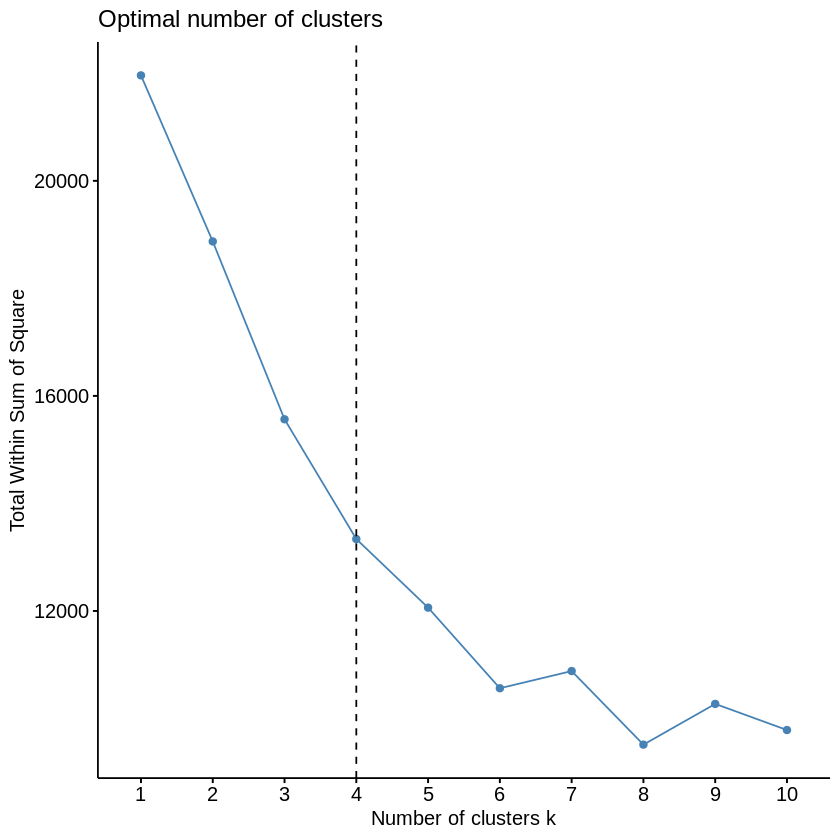

In [51]:
# optimum clusters
fviz_nbclust(final_df, kmeans, method = "wss") + 
geom_vline(xintercept = 4, linetype = 2)


In [52]:
# Clustering
kmean <- kmeans(final_df, 4)

Plotting the clusters

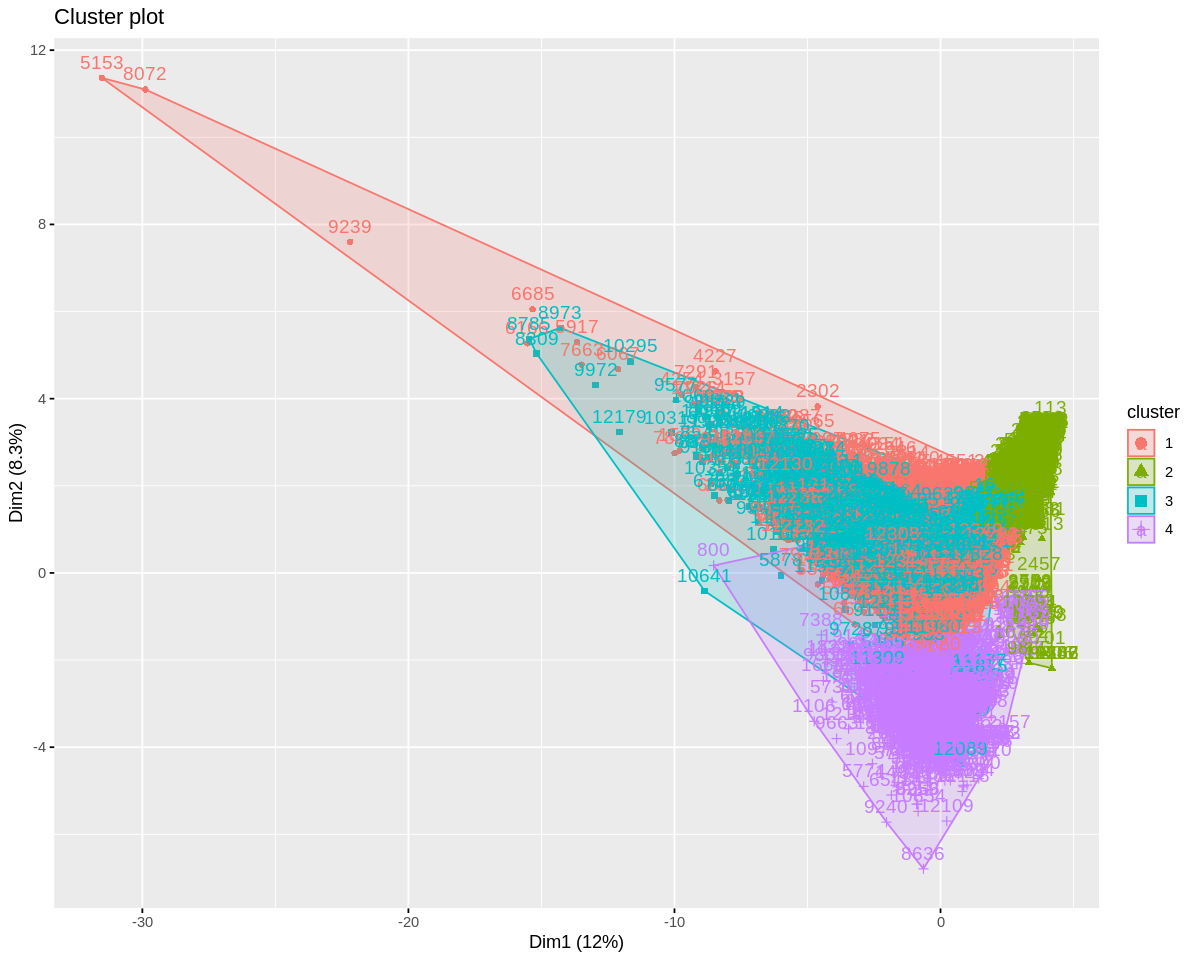

In [53]:
options(repr.plot.width = 10, repr.plot.height = 8) 
fviz_cluster(kmean, final_df)